# Non-Target Analysis of Environmental Mass Spectrometry Data 

{bdg-link-info}`Reference [1] <https://link.springer.com/article/10.1007/s00216-015-8681-7>`
{bdg-link-info}`Reference [2] <https://doi.org/10.1016/j.trac.2023.116944>`
{bdg-link-info}`Reference [3] <https://doi.org/10.1016/j.trac.2019.04.008>`
{bdg-link-info}`Reference [4] <https://pubmed.ncbi.nlm.nih.gov/36174727/>`
{bdg-link-info}`DSFP Homepage <https://dsfp.norman-data.eu/>`
{bdg-link-info}`Notebook Repository <https://github.com/NERC-CEH/DSFP-PyExplorer>`
{bdg-warning-line}`Ongoing Development`
![alt text](../images/ukceh-logo-badge.png "Title")

Primary Contact: [Dr. Ezra Kitson](https://www.ceh.ac.uk/staff/ezra-kitson) | Notebook Top-to-Bottom Runtime ~ 5 Minutes

````{card} Challenge:
Environmental mass-spectrometry often returns data on many more compounds than just those compounds that were the target of the analysis. Non-target analysis is the analysis of the non-target compounds in an analytical spectrum. The first step in non-target analysis for mass spectrometry is non-target screening, which involves starting with a peak in the spectrum at a mass of interest and using all the available information (e.g. retention time, isotope peaks, fragment peaks) to go from a mass to an unequivocal molecular formula, and eventually a confirmed structure [1]. 

In recent years there has been work to standardise and refine this workflow [2], [3] resulting in the creation of the NORMAN Digital Sample Freezing Platform (DSFP), a web portal where users can upload raw mass spectrometry data from a particular project (known as a collection) and have the data automatically screened for non-target analysis peaks [3]. This non-target screening data is then available publicly for download.

The second step of non-target analysis is to perform statistical analysis of the non-target screening data. There are currently a lack of tools to do this on the data available on the NORMAN-DSFP. The purpose of this work was to develop a Python library to make it easier to download, process and analyse the wealth of non-target analysis data available on the NORMAN-DSFP. 
````

````{card} Approach:
We developed a Python library, DSFP-PyExplorer  to enable statistical analysis of non-target analysis data present on the NORMAN Digital Sample Freezing Platform  (DSFP). The library can be run from the command line and the scripts are parametrised by a single .yaml file. The library uses the REST API of the DSFP to download collections and then uses the Pandas and Numpy Python libraries to process the data into a metadata table and an ordination matrix, ready for statistical analysis 
````

```{admonition} Running the Notebook:
:class: tip, dropdown
To run the notebook it is advised to first clone the repository housing the notebook ('*git clone https://github.com/NERC-CEH/DSFP-PyExplorer*'). This will create a folder in the current directory called *DSFP-PyExplorer*, which holds all the relevant files including the notebook, environment file and relevant input data.
```

```{contents}
:local:
```
<!-- https://jupyterbook.org/en/stable/structure/configure.html -->

## Introduction

This notebook demonstrates how to use the DSFP-PyExplorer Python library, to download, process and analyse non target analysis mass spectrometry data located on the NORMAN Digital Sample Freezing Platform (DSFP).

## Downloading data 

```{admonition} Data Access:
:class: note, dropdown
Life-APEX data has been pre-downloaded from the NORMAN-DSFP and stored in the GitHub repository housing this notebook. As such, you do not need to run the commands in the 'downloading data' section of this notebook, however if you would like to process a different data collection, feel free to do so. Life-APEX data is published by the University of Athens under an [open license.](https://dsfp.norman-data.eu/dataset/27df0a3e-3578-4a30-b9e4-1505f9da010d)
```

```{admonition} LIFE-APEX:
:class: note, dropdown
The Life Apex project [collection ID 333] was a pan-EU initiative to perform targeted and non-targeted screening of biota, specifically Apex predators and their prey. To generate this data mass spectrometry was performed with two instrument setups, LC-ESI Positive mode-maXis QTOF (Submission #10) and LC ESI Negative mode-maXis QTOF (Submission #11) on tissue samples from various predator and prey animals prepared with a 50:50 water:methanol solvent. Scans were made from 50 – 1000 m/z, with a resolving power of 30000 for positive mode and 500 for negative mode.Further information on the method is available [4]. 
```

```{admonition} Warning: Computational Demands
:class: warning, dropdown
The code in this section will take over twenty minutes to run (depending on your internet connection speed). It has therefore been commented out.
```

Data on the NORMAN-DSFP is organised into collections. A collection is a group of samples submitted together to the DSFP which may represent a single sampling campaign, or multiple sampling campaigns across a project. With DSFP-PyExplorer we download the molecular data and metadata separately using two different scripts: ```ordination_mat.py``` downloads the molecular data and constructs an ordination matrix, and ```metadata.py``` downloads the associated metadata. 

To specify which collection to download we edit the ```config.yaml``` file in the root folder of the repository. Let's have a look an example ```.yaml``` file that will download data from the LIFE APEX collection.

There are a few aspects of this ```yaml``` file to unpick. Starting from top:
* ```COLLECTION_ID``` instructs the script which data collection from the DSFP to process. 
* ```DOWNLOAD: True``` instructs the script to download molecular data from the NORMAN-DSFP and store it in ```DOWNLOAD_DIR```. 

Next are arguments for constructing the ordination matrix:
*  ```ORDPATH``` specifies where the ordination matrix should be saved to. 
* ```METHOD``` specifies how to deal with compounds that match to multiple peaks in a sample. ```max``` takes the maximum peak area value, ```sum```, sums the peak area values.  
* ```THREADS``` specifies how many parallel CPU threads to use when downloading/loading/ordinating molecular data. 

The command line scripts below will run both scripts with the specified parameters. They have been commented out since the data has been pre-downloaded and processed for this notebook. 

In [1]:
%%bash 
#python ../metadata.py notebook_config.yaml


In [2]:
%%bash
#python ../ordination_mat.py notebook_config.yaml

The output of the scripts are two ```.csv``` files that we can open using the ```pandas``` library in Python. We'll start by opening the ordination matrix. This consists of over 400 biological samples as rows, and over 50,000 molecules as columns.

In [3]:
import pandas as pd
#read the ordination data (this will take a few seconds)
ordinationData = pd.read_csv("../ordination/333_ordination.csv", index_col=0)
#print the matrix shape (rows x columns)
print(ordinationData.shape)
#print the first five rows 
ordinationData.head()

(413, 56248)


,NS00037893,NS00058165,NS00043788,NS00043046,NS00047083,NS00017860,NS00060002,NS00083992,NS00029295,NS00073764,...,NS00096343,NS00014879,NS00068277,NS00032640,NS00100956,NS00024942,NS00024645,NS00066989,NS00059513,NS00080368
19082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51058.1526,NaN,54269.933000,8552.862857,NaN,NaN,NaN,NaN,NaN,NaN
21537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4752.300889,23547.166500,NaN,NaN,NaN,NaN,NaN,NaN
19919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15188.6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,172948.164843,251080.432380,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19871,NaN,NaN,NaN,NaN,NaN,3433.188727,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10713.063529,NaN,NaN,NaN,NaN,NaN,NaN


The metadata table helps us decipher what samples the row indices in the ordination matrix refer to. The 'ID' column of the metadata table maps to the index column of the ordination matrix. 

In [4]:
#read the metadata table
metaData = pd.read_csv("../metadata/333_metadata.csv", index_col=0)
#print the matrix shape (rows x columns)
print(metaData.shape)
# print the columns
print(metaData.columns)
#print the first five rows 
metaData.head()

(436, 27)
Index(['Collection', 'Sample type', 'Short name for contribution',
       'Sampling date', 'Analysis date', 'Instrument setup used',
       'Monitored City', 'Monitored country', 'Latitude', 'Longitude',
       'Alive or not', 'Basis of measurement', 'Biota species name (in Latin)',
       'Distance from the river source (km)',
       'Fat content (% of total wet matter)',
       'Name of river, estuary, lake, reservoir, sea', 'Number of orgnanisms',
       'Origin of biota', 'Proxy pressures', 'River basin name', 'Size (mm)',
       'Species group', 'Tissue', 'Water content(%)', 'Weight (kg)',
       'field_country', 'matrix'],
      dtype='object')


,Collection,Sample type,Short name for contribution,Sampling date,Analysis date,Instrument setup used,Monitored City,Monitored country,Latitude,Longitude,...,Origin of biota,Proxy pressures,River basin name,Size (mm),Species group,Tissue,Water content(%),Weight (kg),field_country,matrix
ID,,,,,,,,,,,,,,,,,,,,,
37,LIFE APEX,Real Sample,LIFE APEX 01 Bream Muscle from Danube Jochenstein,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Jochenstein,NaN,51.83,12.22,...,River,NaN,Danube river basin,NaN,NaN,Muscle,NaN,NaN,Germany,biota
38,LIFE APEX,Real Sample,LIFE APEX 02 Bream Muscle from Elbe,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Wittenberge,Germany,53.01,11.75,...,River,NaN,Elbe river basin,NaN,NaN,Muscle,NaN,NaN,Germany,biota
39,LIFE APEX,Real Sample,LIFE APEX 03 Bream Muscle from Rhine Bimmen,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Emmerich,Germany,51.85,6.24,...,River,NaN,Rhine river basin,NaN,NaN,Muscle,NaN,NaN,Germany,biota
40,LIFE APEX,Real Sample,LIFE APEX 04 Bream Muscle from Belauer See,"Thu, 01/01/2015 - 00:00","Wed, 01/01/2020 - 00:00",LC-Bruker maXis QTOF: Submission #10,Neumunster,Germany,54.07,9.98,...,River,NaN,NaN,NaN,NaN,Muscle,NaN,NaN,Germany,biota
41,LIFE APEX,Real Sample,LIFE APEX 05 Bream Muscle from Saar Gudingen,"Thu, 01/01/2015 - 00:00","Thu, 01/01/2015 - 00:00",LC-Bruker maXis QTOF: Submission #10,Saarbrucken,Germany,49.25,6.97,...,River,NaN,Rhine river basin,NaN,NaN,Muscle,NaN,NaN,Germany,biota


## Principal component analysis

Now we can start to perform statistical analysis on the non target analysis data. Principal component analysis (PCA) is an unsupervised dimensionality reduction technique which is done by performing eigen decomposition of the covariance matrix of the ordination matrix, and then visualising the principal eigenvectors of this transformation. In simple language this allows us to visualise how similar samples are to one another along the main drivers of variation across compounds. DSFP-PyExplorer saves the sample scores (i.e. the PC1,PC2,…,PCN values for each sample), the PCA loadings (i.e. how each compound is transformed to generate the principal component aces) and PCA biplots and loading plots which can be styled using the metadata table. The library offers advanced options for peak-area normalisation and missing-data imputation, which reflect the latest statistical research. 

To perform PCA we first need to add the following parameters to the the ```.yaml``` file.

Let's unpick the above, starting from the top: 

* ```SUBSET: "Instrument setup used"``` determines whether to subset the data before performing PCA. Set to ```none``` to do PCA on all the data. Subsetting means the data is divided based on a categorical variable in the metadata table, and PCA is performed independently on each division of the dataset. 

Next we have parameters that determine how the PCA biplots and loading plots should be made:

* ```PLOT: True``` determines whether ```.svg.``` plot figures should be saved to ```PCAPATH```. 
* ```HUE: 'Tissue'``` - determines the column of the metadata file to colour the scatter points by in PCA biplots. 
* ```STYLE: 'Species group'``` - determines the column of the metadata file to style the the scatter points by in PCA biplots. 
* ```LEGEND_BBOX_X``` and ```LEGEND_BBOX_Y``` determines where in the plot the legend should be placed. 

Then there are parameters about how to normalise the data before performing PCA. Normalisation can take place row-wise (to account for concentration differences between samples) and column-wise (to account for heteroskedasticity of compounds). A good primer on peak area normalisation can be read [here](https://link.springer.com/article/10.1186/1471-2164-7-142). Peak area normalisation is performed using the [PyKrev Python library](https://github.com/Kzra/pykrev). See the documentation for PyKrev.normalise_intensity() for more information on the parameters below.

* ```NORM_ORDER: "rowcol"``` specifies what order to normalise the data in. One of ```row```, ```col```, ```rowcol```, ```colrow``` or ```none```.
* ```ROW_METHOD: "sum"``` specifies how to row-normalise the ordination data before doing PCA. 
* ```ROW_TRANSFORM: "power3"``` specifies to row-transform the ordination data before doing PCA. 
* ```COL_METHOD: "sum"``` specifies how to column-normalise the ordination data before doing PCA. 
* ```COL_TRANSFORM: "power3"```specifies how to column-transform the ordination data before doing PCA.

Then there are parameters that determine the number of principal components, and loadings associated with those components to keep.

* ```COMPONENTS: 4``` - Number of principal components to keep, PCA biplots will be made for all combinations of these loadings.
* ```LOADINGS: 10``` - Number of positive and negative loadings (ranked by coefficient) to plot. The top 10 positive and negative loadings will be plotted.   

Finally there are parameters for the ```susdat.py``` script which converts the NORMAN SUSDAT IDs (e.g. NS00037893) of the top loadings into compound names or some other chemical identifier: 

* ```SUSDAT: "Compound name"``` specifies which field in the susdat json file to replace the NSID with. Set to "None" if you don't want to change the IDs. 
* ```CACHE: True``` determines whether or not to use the downloaded susdat json files cached locally. The script will look in ```SUSPATH``` to see whether or not susdat json files have been downloaded. If they haven't the script will download them. 

The command line scripts below will run PCA on the Life-Apex data, subsetting the data first by Instrument setup used, colouring the scatter points by tissue type, and styling them by species.


In [5]:
%%bash
python ../pca.py notebook_config.yaml

susdat: 100%|██████████| 20/20 [00:00<00:00, 6883.24it/s]


Let's have a look at each the first two principal components as a biplot and as loading plots. We'll focus on Instrument Setup #10 which was LC-ESI Positive Mode. The biplot of the two leading principal components shows a clear separation of tissue type on the first principal component, with muscle tissue samples being found generally with negative PC1 values, amd liver tissue samples being found generally to have positive PC1 values. There is also a separation of species along PC1, with fish samples generally having negative scores and bird samples generally having positive scores. 'Other' species have a mix of both positive and negative scores.

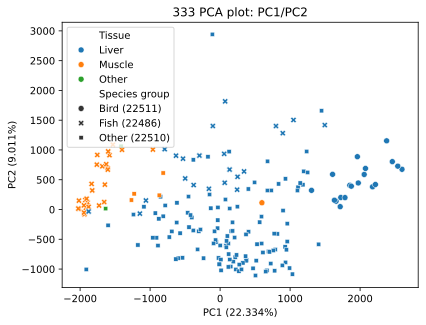

In [6]:
from IPython.core.display import SVG
SVG(filename="../pca/333/LC-Bruker maXis QTOF Submission 11/PC1_PC2.svg")

Looking at the top 10 loadings along PC1 can help elucidate what compounds were responsible for driving this sample separation. We can see that the compound 'Inosine' was particularly associated with negative PC1 scores. This suggests a link between inosine and muscle tissue in fish. Indeed, inosine (a type of nucleoside found in tRNAs) has been shown to form as a [degradation product of ATP in chill-stored post-mortem fish storage](https://academic.oup.com/ijfst/article/41/4/341/7863908), which may explain this finding. 

In a similar way we can see that a type of octadecatrienoic acid is associated with some liver tissue samples, especially that of birds. Searching for the [compound on the pubchem database](https://pubchem.ncbi.nlm.nih.gov/compound/5497123) we find that it is primary peroxidation product of alpha-linoleic acid, an intermediate compound metabolism of certain lipids like prostaglandin, a function which occurs primarily in the liver of most organisms. 

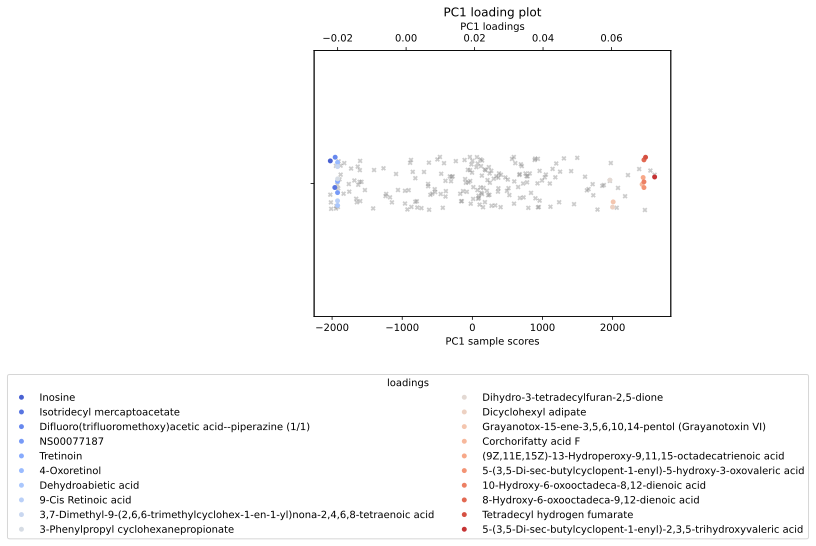

In [7]:
SVG(filename="../pca/333/LC-Bruker maXis QTOF Submission 11/PC1_loadings.svg")

The loadings that PCA gives us are averaged across many samples, so to confirm the trends indicated by the PCA plots, we can access the raw data and create box plots of the compounds of interest across the relevant metadata categories. The boxplots below support our interpretation of the PCA, namely that inosine is concentration in fish liver tissue, and octadecatrienoic acid is mainly found in bird liver tissue. 

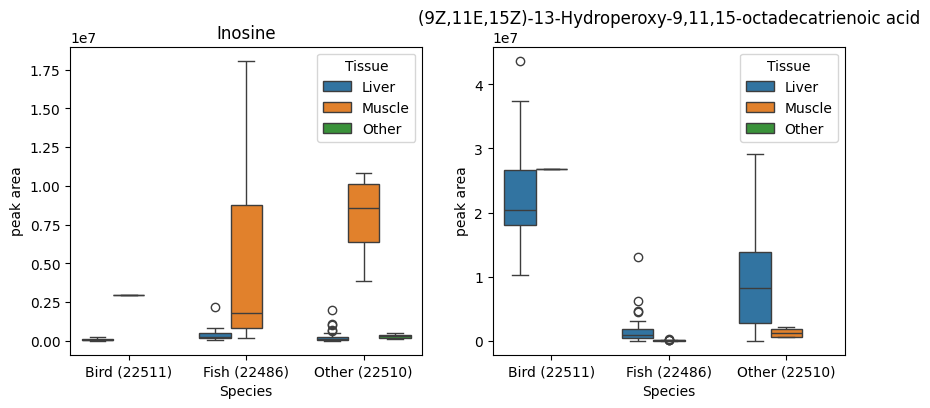

In [8]:
import seaborn as sns
from matplotlib import pyplot as plt
fig, axes = plt.subplots(ncols=2)
fig.set_size_inches(10,4)
compoundNames = ['Inosine','(9Z,11E,15Z)-13-Hydroperoxy-9,11,15-octadecatrienoic acid']
# read metadata table
metaData = pd.read_csv("../metadata/333_metadata.csv", index_col=0)
# make metadata row order match ordination data row order
metaData = metaData.loc[ordinationData.index,:]
#filter both datasets to be just submission 11 
boolFilter = metaData['Instrument setup used'] == "LC-Bruker maXis QTOF: Submission #11"
metaFilter = metaData.loc[boolFilter,:]
ordFilter = ordinationData.loc[boolFilter,:]
# loadings data
loadings = pd.read_csv('../pca/333/LC-Bruker maXis QTOF Submission 11/PC1_loadings.csv', index_col=0)
for i in range (0,len(compoundNames)):
    # retrieve nsid for the compound of interest 
    nsid = loadings.set_index('mols').loc[compoundNames[i],'sus']
    #create a dataframe to plot from
    plotData = pd.DataFrame() 
    plotData['peak area'] = ordFilter[nsid]
    #move the metadata rows to plot data 
    plotData['Tissue'] = metaFilter['Tissue']
    plotData['Species'] = metaFilter['Species group']
    #use seaborn to plot 
    sns.boxplot(data=plotData,y='peak area',x='Species',hue='Tissue', ax=axes[i])
    axes[i].set_title(compoundNames[i])

## UpSet plot analysis
UpSet plots are a way to visualise the intersections of compounds in different groups of samples. UpSet plots are similar in principal to venn diagrams, but work better when you have more than three groups. DSFP-PyExplorer uses the [UpSetPlot Python library](https://github.com/jnothman/UpSetPlot) to perform the intersection analysis and create the plots. The groups for the intersection analysis can be any metadata variable from the metadata table. Users can specify to first filter the data to the top n compounds by peak area in a group to reduce the computational time needed to calculate intersections. 

We can use UpSet plots to look at what compounds are unique to different tissues, or different species groups.

To perform UpSet plot analysis we need to add the following parameters to the ```.yaml``` file:

Here's an explanation of the parameters, starting from the top: 
* ```SUBSET: "Instrument setup used"``` determines whether to subset the data before performing UpSet plot analysis. 
* ```UPSET_PATH``` is where the UpSet plot image files, and intersection data will be stored.
* ```GROUPING``` is the metadata category from the metadata table used to create the intersections.
* ```FILTER_TOP_N``` is the number of compounds (ranked by peak area) from each group to include in the analysis. If False, all compounds will be used.
* ```MAX_SUBSET_RANK``` determines whether to limit the number of intersections plotted (ranked by intersection size).
* ```MIN_SUBSET_SIZE``` determines whether to limit the number of intersections plotted based on a minimum intersection size threshold. 
* ```SUSDAT: "Compound name"``` specifies which field in the SUSDAT json file to replace the NSID with. Set to "None" if you don't want to change the IDs. 
* ```CACHE: True``` determines whether or not to use the downloaded susdat json files cached locally. The script will look in ```SUSPATH``` to see whether or not susdat json files have been downloaded. If they haven't the script will download them. 

If you have more than five groups, it is recommended to set ```MAX_SUBSET_RANK``` and ```MIN_SUBSET_SIZE``` to increase the readability of the plots. ```FILTER_TOP_N``` is recommended for large datasets (i.e. with more than 10,000 compounds) to reduce computational time. 

The command line script below will run UpSet plot analysis on the Life-Apex data, subsetting the data first by Instrument setup used, and using Tissue group to form intersections. 


```{admonition} Warning: Computational Demands
:class: warning, dropdown
The code in this section will take about ten minutes to run if SUSDAT is not cached. Ignore the FutureWarning, this does not affect the results of the script.
```

In [9]:
%%bash 
python ../upset.py notebook_config.yaml

susdat: 100%|██████████| 56248/56248 [00:31<00:00, 1768.38it/s]
/home/ezrkit/.local/lib/python3.9/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/ezrkit/.local/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the 

Let's have a look at the UpSet plot that we have just created. We can see that *liver* has the most unique compounds (311) and *muscle* the least (79), the largest intersection (400) is compounds found in all tissue types, the smallest intersection (71) is compounds shared between *liver* and *other*. 

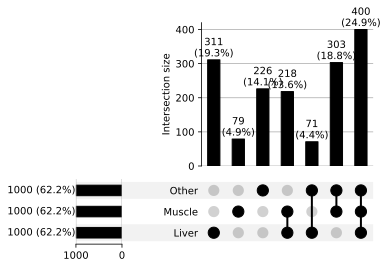

In [10]:
SVG(filename="../upset/333/LC-Bruker maXis QTOF Submission 11/upset_plot.svg")

We can read the data behind the plot saved in ```fromContents.csv``` to look at precisely what compounds were in each intersection.

In [11]:
fromContents = pd.read_csv("../upset/333/LC-Bruker maXis QTOF Submission 11/fromContents.csv")
fromContents

,Liver,Muscle,Other,id
0,True,False,False,"Hydrazine, phenyl-, hydrochloride (1:?)"
1,True,False,False,"6,7,12b,13-Tetrahydro-2H,4H,10H-[1,3]dioxolo[4..."
2,True,True,True,1-Phenylethyl 2-methylbutyrate
3,True,True,True,Ethyl 1-acetylpiperidine-4-carboxylate
4,True,True,True,1-(Hexadecylmethylamino)propan-2-ol
...,...,...,...,...
1603,False,False,True,(E)-2-methoxy-4-(1-propenyl)phenyl isovalerate
1604,False,False,True,"6-Hydroxy-3,4-dihydro-2(1H)-quinolinone"
1605,False,False,True,"(3aS,7aR,10R,11aS,11bS)-Decahydro-10-hydroxy-7..."
1606,False,False,True,"2-(3A,4,5,6,7,7a-Hexahydro-1H-4,7-methanoinden..."


To find out the compounds unique to liver tissue, we can use boolean indexing. This gives us a list of 311 compounds found in the liver but not in muscle or other tissue.

In [12]:
liverCompounds = fromContents.loc[(fromContents['Liver'] & ~(fromContents['Muscle']|fromContents['Other'])),'id']
liverCompounds.head()

0               Hydrazine, phenyl-, hydrochloride (1:?)
1     6,7,12b,13-Tetrahydro-2H,4H,10H-[1,3]dioxolo[4...
11                            Oleic acid diethanolamide
17       2-Methyl-N-phenyl-N-(4-piperidinyl)propanamide
19    4-(3,3-Dimethylbicyclo[2.2.1]hept-2-yl)-2-ethy...
Name: id, dtype: object

```{admonition} Large language models:
:class: tip, dropdown
The following section involves running an open-source large language model (GPT-OSS-20B) hosted on a private company's servers. 
What an AI company does with the input data you feed their model is not always transparent, so you should treat any use of a free-tier API like the one below with caution. 
In this case we are only feeding the model data that already exists in the public-domain, so it is a low-risk application. 

In order to run the below code, you will need to register an API key with Groq. The code has been commented out, and the LLM output has been cached so it can be printed without running the code.

Note, the Groq-GPT-OSS-20B plan was included in free-tier at time of writing (October 2025), but this may change.
```

One way we can screen this list for potentially interesting molecules is using a large language model API. When choosing a large language model API in Python there are three things to consider: 
1. Which model will you use? In this instance we are using the open-source model gpt-oss-20b model developed by OpenAI.
2. Which organisation's servers will you choose (or are you going to run the model locally)? In this case we are using US cloud company Groq's hosting of the gpt-oss-20b as it's covered by a free tier plan. 
3. Which Python library will you use to handle the API requests? In this instance we are opting for [openAI](https://github.com/openai/openai-python) as it is compatible with Groq's gpt-oss-20b endpoint.

We will create a prompt asking the LLM to screen the list of liverCompounds and flag any that are associated with liver function in the scientific literature. 

In [13]:
"""
from openai import OpenAI
import os
from dotenv import load_dotenv

#save your api key in .env
load_dotenv('../.env')

client = OpenAI(
    api_key=os.environ.get("GROQ_API_KEY"),
    base_url="https://api.groq.com/openai/v1",
)

completion = client.chat.completions.create(
        model="openai/gpt-oss-20b",
        messages=[
            {"role": "developer", "content": "Present results in a table"},
            {
                "role": "user",
                "content": f"Look through the compounds following this message. Can you link any of these compounds with the liver: {list(liverCompounds)}",
            },
        ],
    )

print(completion.choices[0].message.content)
with open("LLM_output.txt", "w", encoding="utf-8") as file:
    file.write(content)
"""

with open("LLM_output.txt", "r", encoding="utf-8") as file:
    content=file.read()
print(content)



**Liver‑Related Compounds (selected from the list)**  

| # | Compound (common name or key descriptor) | Liver‑related relevance (metabolism, hepatotoxicity, therapeutic use, etc.) |
|---|------------------------------------------|--------------------------------------------------------------------------|
| 1 | **Testosterone ketolaurate** | An ester of testosterone; hydrolyzed in the liver to active testosterone. Liver enzymes (CYP3A4) are responsible for its metabolism. Monitoring of liver function is recommended in long‑term therapy. |
| 2 | **Pazufloxacin** | Fluoroquinolone antibiotic. Primarily metabolised by the liver (CYP1A2, CYP2C9). Reported cases of drug‑induced liver injury (DILI) in patients, especially with pre‑existing hepatic disease. |
| 3 | **Fusidic acid** | Topical or systemic antibiotic. Liver‑mediated oxidation (CYP3A4) produces inactive metabolites. Hepatotoxicity is uncommon but can occur, especially with prolonged systemic exposure. |
| 4 | **Caverject | Alpros

Reading through this information can help give context to the results of the UpSet plot and filter down the search for compounds of interest: for example Betahistine is indeed a medication for Meniere's disease, and it is metabolised by the liver, which could explain why the UpSet plot analysis did not find it present in other tissue types.  

However, large language models hallucinate and often produce false results, so it's important to fact-check all of the claims made here. A big problem with large language models is they don't actually understand if what they are telling you is true, so they are unable to refuse a request on the grounds that they can't answer it properly. For example, if you ask gpt-oss-20b to provide references to support the above data table, it will create fake references that look plausible, but that don't actually exist. 

## Other datasets available on NORMAN-DSFP

There are many other collections of data available on the NORMAN-DSFP in a range of locations and from diverse environmental matrices (including biota, wastewater, surface water, sediment). Below we cycle through the metadata files downloaded by ```metadata.py``` and use them to create a map of showing the samples currently available on the NORMAN-DSFP. (Note this only includes samples that have unrestricted access).
If you have LC-MS or GC-MS data that you would like to perform non-target analysis on, it is free to submit to the NORMAN-DSFP and your data will be automatically processed by a peer-reviewed non-target analysis pipeline. 

In [14]:
import os 
import pandas as pd
metafiles = os.listdir('../metadata')
collections = set([c.split('_')[0] for c in metafiles])
#merge all the metadata into one dataframe
baseDf = pd.DataFrame()
for c in collections:
    cData = pd.read_csv(f"../metadata/{c}_metadata.csv")
    cData['collectionID']=c
    baseDf=pd.concat([baseDf,cData])

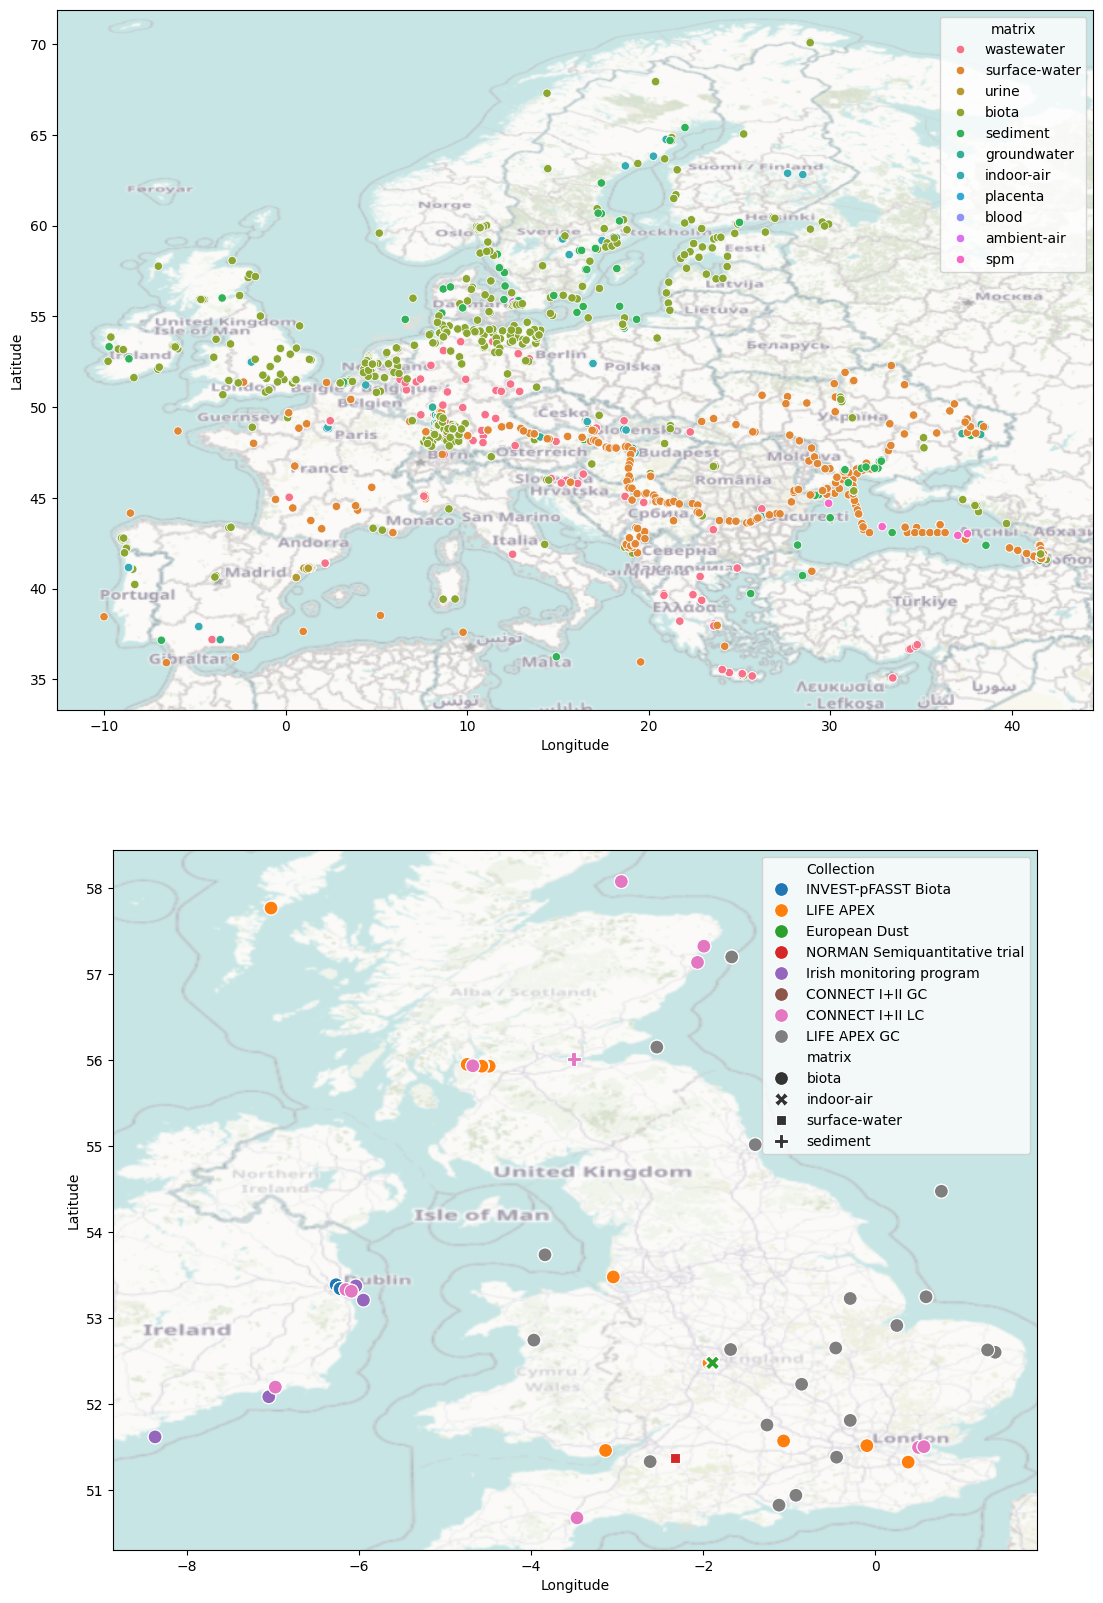

In [15]:
import contextily as cx
import seaborn as sns
from matplotlib import pyplot as plt
import geopandas as gpd
fig,ax = plt.subplots(nrows=2)
fig.set_size_inches(20,20)
mapDf = gpd.GeoDataFrame(baseDf.filter(['Longitude','Latitude','Collection','matrix']).reset_index(), geometry=gpd.points_from_xy(baseDf.Longitude, baseDf.Latitude))


# Define Europe bounding box
eu_lat_min, eu_lat_max = 35.0, 71.0
eu_lon_min, eu_lon_max = -25.0, 45.0

# Filter GeoDataFrame to Europe bounds
europe_mapDf = mapDf[
    (mapDf['Latitude'] >= eu_lat_min) & (mapDf['Latitude'] <= eu_lat_max) &
    (mapDf['Longitude'] >= eu_lon_min) & (mapDf['Longitude'] <= eu_lon_max)
]


# Define UK bounding box
uk_lat_min, uk_lat_max = 49.9, 60.9
uk_lon_min, uk_lon_max = -8.6, 1.8

# Filter GeoDataFrame to UK bounds
uk_mapDf = mapDf[
    (mapDf['Latitude'] >= uk_lat_min) & (mapDf['Latitude'] <= uk_lat_max) &
    (mapDf['Longitude'] >= uk_lon_min) & (mapDf['Longitude'] <= uk_lon_max)
]


sns.scatterplot(data=europe_mapDf,x='Longitude',y='Latitude', hue='matrix', ax=ax[0], legend=True)
cx.add_basemap(ax[0],crs='epsg:4326', attribution=False, alpha=.5)
sns.scatterplot(data=uk_mapDf,x='Longitude',y='Latitude', hue='Collection', ax=ax[1], legend=True, style='matrix', s=1e2)
cx.add_basemap(ax[1],crs='epsg:4326', attribution=False, zoom=6, alpha=.5)

# Conclusion

In this notebook we looked at how to use DSFP-PyExplorer library to analyse non-target analysis mass-spectrometry data. We studied two scripts in detail, ```pca.py``` and ```upset.py```. These scripts were used to analyse the chemical make up of biological tissue samples in the Life-APEX collection. DSFP-PyExplorer can be used for additional analysis not covered in this notebook, for example Linear Discriminant Analysis, or K-means clustering. For a full overview of the library, see the GitHub page: https://github.com/NERC-CEH/DSFP-PyExplorer

![logo](../dsfp-pylogo.png)